In [17]:
from __future__ import print_function, unicode_literals, division
from __future__ import absolute_import
from future import standard_library, utils
from future.builtins import (ascii, bytes, chr, dict, filter, hex, input,
                             int, map, next, oct, open, pow, range, round,
                             str, super, zip)

In [1]:
import sqlite3

In [21]:
import numpy as np
import sys
sys.path.append('..')
sys.path.append('../../../provenance_scripts/')
import skin_core_scanner_simple as scss
reload(scss)
import equil_solver as es
reload(es)
import newcomb as new
reload(new)
import lambda_k_plotting_simple as plot
reload(plot)

 
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm, BoundaryNorm
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
sns.set_style('ticks')
sns.set_context('poster')

In [22]:
connection = sqlite3.connect('../../output/output.db')
cursor = connection.cursor()

In [23]:
def select_datetime(cursor, statement, parameters=None):
    statement_start = "SELECT datetime FROM Runs WHERE " 
    if parameters is not None:
        cursor.execute(statement_start + statement, parameters)
    else:
        cursor.execute(statement_start + statement)
    results = cursor.fetchall()
    results = [item for tup in results for item in tup]
    return results

In [25]:
results = select_datetime(cursor, "skin_width > 0.09 AND \
                                   skin_width < 0.2 AND \
                                   transition_width > 0.09 AND \
                                   transition_width <0.2")
print(results)

[u'2015-10-28-00-33', u'2015-10-28-00-38', u'2015-10-28-00-44', u'2015-10-28-00-49', u'2015-10-28-00-55']


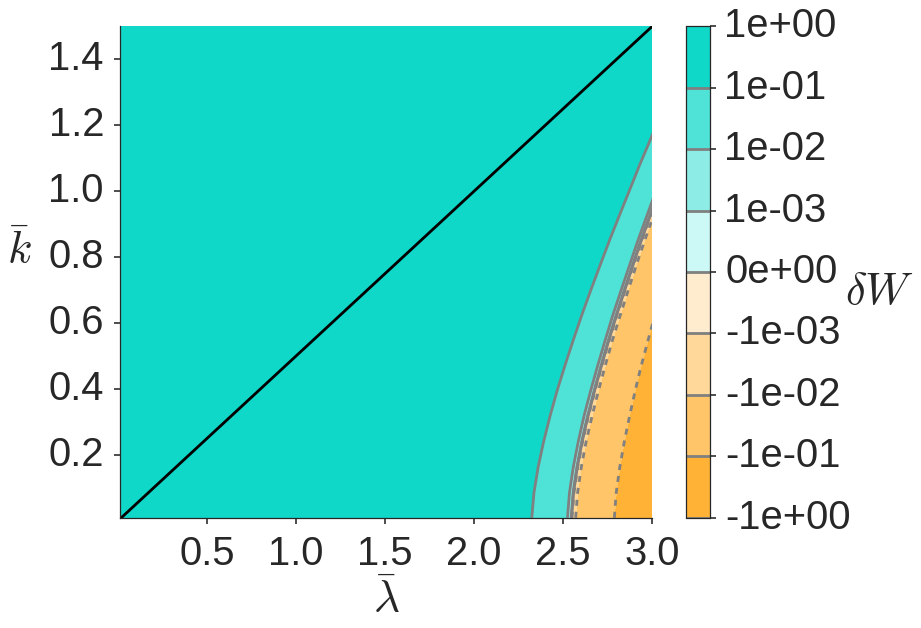

In [39]:
plot.plot_lambda_k_space_dw('../../output/2015-10-28-00-44/meshes.npz', 0.11, 'ep12-m1', 
                            mode_to_plot='m_0', levels=[-1, -1e-1, -1e-2, -1e-3, 
                                                            0, 1e-3, 1e-2, 1e-1, 1], 
                            floor_norm=True, analytic_compare=False)